In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import os
sns.set(rc={'figure.figsize':(10,9)})

In [6]:
main()

<Figure size 720x648 with 0 Axes>

### function to draw

In [2]:
def Draw(distribution_table, attribute, category, distribution_type):
    idx = []
    for i in range(1,len(distribution_table)):
        idx.append(str(i))
    df = pd.DataFrame(distribution_table[0:-1, 0:-1], index = idx, columns = ['1','2','3','4'])
    chart = sns.heatmap(df, cmap="Blues", annot = True, linewidth = 0.5)
    chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
    chart.set(xlabel = 'label', ylabel = 'answer')
    chart.xaxis.tick_top()
    chart.xaxis.set_label_position('top')
    title = category+'_'+attribute+'_'+distribution_type
    chart.set_title(title, fontsize = 20, fontweight = 'bold')
    plt.savefig('figures/'+title+'.jpg' , dpi = 100)
    plt.clf()

### functions to do all the calculations

In [3]:
def FindBiggestAnswer(nums: list[[int]]):
    biggest = -1
    for row in nums:
        if row[0] > biggest:
            biggest = row[0]
    return biggest

def CalcRowSums(nums: list[[int]]):
    for row in nums:
        sum = 0
        for i in row:
            sum += i
        row.append(sum)

def CalcColSums(nums: list[[int]]):
    nums.append([])
    for col in range(len(nums[0])):
        sum = 0
        for row in range(len(nums) - 1):
            sum += nums[row][col]
        nums[-1].append(sum)

def CalcDelegabilityDistribution(nums: list[[int]]):
    # print(nums)
    new_2darr = copy.deepcopy(nums)
    for row in range(len(new_2darr)-1):
        for col in range(len(new_2darr[0])-1):
            # print(new_2darr[row][col], type(new_2darr[row][col]), new_2darr[row][-1], type(new_2darr[row][-1]))
            if new_2darr[row][-1] != 0:
                new_2darr[row][col] = new_2darr[row][col] / new_2darr[row][-1]
            # print(new_2darr[row][col])
            else:
                new_2darr[row][col] = 0
    return new_2darr

def CalcAnswerDistribution(nums: list[[int]]):
    new_2darr = copy.deepcopy(nums)
    for col in range(len(new_2darr[0])-1):
        for row in range(len(new_2darr)-1):
            if new_2darr[-1][col] != 0:
                new_2darr[row][col] = new_2darr[row][col] / new_2darr[-1][col]
            else:
                new_2darr[row][col] = 0
    return new_2darr

def CalcJointDistribution(nums: list[[int]]):
    new_2darr = copy.deepcopy(nums)
    for row in range(len(new_2darr)-1):
        for col in range(len(new_2darr[0])-1):
            if new_2darr[-1][-1] != 0:
                new_2darr[row][col] = new_2darr[row][col] / new_2darr[-1][-1]
            else:
                new_2darr[row][col] = 0
    return new_2darr

def GenerateArray(df,attribute, label):
    x = []
    for idx in df.index:
        # print(type(df[attribute][idx]))
        # print(int(df[attribute][idx]))
        # if df[attribute][idx] == 'blank':
        #     continue
        # if not isinstance(df[attribute][idx], int):
        #     continue
        # print(type(df[attribute][idx]), type(df[label][idx]))
        x.append([int(df[attribute][idx]), df[label][idx]])
    x_arr = np.array(x)
    answer_label = [[0]*4 for i in range(FindBiggestAnswer(x))]
    for row in x_arr:
        row[0] -= 1
        row[1] -= 1
    for row in x_arr:
        r = row[0]
        c = row[1]
        answer_label[r][c] += 1
    CalcRowSums(answer_label)
    CalcColSums(answer_label)
    # answer_label_arr = np.array(answer_label)
    # print(answer_label_arr)
    return answer_label
    

### functions before calculate joint distribution

In [4]:
def OutputResults(file, category):
    df = pd.read_csv(category + '/' + file)
    file_name = file.replace('.csv','') # ex: japan_personal_entertainment
    # print(file_name)
    attributes = GetDFAttributes(df)
    # print(attributes)
    for attribute in attributes:
        # print(attribute, '1')
        sub_df = CreateNewDF(attribute, 'Delegability', df)
        if np.isnan(sub_df[attribute][1]):
            continue
        # print(sub_df)
        array = GenerateArray(sub_df, attribute, 'Delegability')
        delegability_distribution = np.array(CalcDelegabilityDistribution(array))
        answer_distribution = np.array(CalcAnswerDistribution(array))
        joint_distribution = np.array(CalcJointDistribution(array))
        # print(label_distribution)
        # print(answer_distribution)
        # print(joint_distribution)
        # Draw(answer_distribution, attribute, file_name, 'answer_distribution')
        # Draw(delegability_distribution, attribute, file_name, 'delegability_distribution')
        Draw(joint_distribution, attribute, file_name, 'joint_distribution')
        

def GetDFAttributes(df):
    attributes = []
    for idx, column in enumerate(df.columns): # df.columns returns all column title of the df
        # idx, column is for example
        '''
        0 Unnamed: 0
        1 task
        2 gender
        3 age
        4 tech_level
        5 edu_level
        6 d_social_skills
        7 d_creativity
        8 d_effort
        9 d_expertise
        10 d_abilities
        11 r_accountable
        12 r_uncertainty
        13 r_impact
        14 t_machine_ability
        15 t_process
        16 t_values
        17 Delegability
        '''
        attributes.append(column)
    attributes = attributes[4:-1]
    return attributes
    # returns a list consists fromthe 4th element to last second element from above, each element is a string

def CreateNewDF(attribute, label, df):
    newDF = df[[attribute, label]]
    return newDF
    # attribute is one column in original table. label is for example delegability
    # returns a new df that has two column, one column is attribute, another column is label.
    # input df is not used in this function

## Iterate through all file

In [5]:
def main():
    main_directory = r'/Users/gujiaxian/Desktop/论文/project/calculate joint probability distribution/original categorized data'
    dir_list = []

    # this for loop iterate all folders under main_directory. Generate a list that consists of all folders under main_directory.
    for filename in os.listdir(main_directory):
        if filename == '.DS_Store':
            continue
        inner_dir = main_directory + '/' + filename
        dir_list.append(inner_dir)
    # print(dir_list)
    
    # this double for loop iterate through all files in main_directory. 
    # each file name is an input to OutputResults. The other input to OutputResults is the absolute path that consists of each file.
    # all for loops are fine to use.
    for category in dir_list: # dir_list is all 4 categories(us per, us exper, jp per, jp exper)
        if filename == '.DS_Store':
            continue
        for filename in os.listdir(category): # filename is the real file name of each csv file, ex:japan_personal_entertainment.csv
            if filename == '.DS_Store':
                continue
            OutputResults(filename, category)

In [60]:
pd.set_option('display.max_rows', 20)

In [61]:
america_personal_business = pd.read_csv("original categorized data/america personal/america_personal_business.csv")

In [62]:
america_personal_business.shape

(104, 21)

In [63]:
for idx, column in enumerate(america_personal_business.columns):
    print(idx, column)

0 Unnamed: 0
1 task
2 gender
3 age
4 tech_level
5 edu_level
6 s_social_skills
7 s_creativity
8 d_effort
9 d_expertise
10 d_abilities
11 r_accountable
12 r_uncertainty
13 r_impact
14 m_intrinsic
15 m_learning
16 m_important
17 t_machine_ability
18 t_process
19 t_values
20 label


In [64]:
america_personal_business[['d_effort','label']]

,d_effort,label
0,4,3
1,4,2
2,5,2
3,5,3
4,4,3
...,...,...
99,3,3
100,3,1
101,5,3
102,5,3


In [65]:
type(america_personal_business)

pandas.core.frame.DataFrame

In [66]:
america_personal_business_d_effort = pd.DataFrame(data = america_personal_business[['d_effort','label']])
america_personal_business_d_effort

,d_effort,label
0,4,3
1,4,2
2,5,2
3,5,3
4,4,3
...,...,...
99,3,3
100,3,1
101,5,3
102,5,3


In [67]:
x = []
for idx in america_personal_business_d_effort.index:
    # print('d_effort is {}, label is {}.'.format(america_personal_business_d_effort['d_effort'][idx], america_personal_business_d_effort['label'][idx]))
    x.append([america_personal_business_d_effort['d_effort'][idx], america_personal_business_d_effort['label'][idx]])
print(x)
x_arr = np.array(x)
answer_label_distribution = [[0]*4 for i in range(FindBiggestAnswer(x))]
# print(answer_label_distribution)
for row in x_arr:
    row[0] -= 1
    row[1] -= 1
for row in x_arr:
    r = row[0]
    c = row[1]
    # print(r, c)
    answer_label_distribution[r][c] += 1
    # print(answer_label_distribution)
# print(answer_label_distribution)
answer_label_distribution_arr = np.array(answer_label_distribution)
# print(answer_label_distribution_arr)

CalcRowSums(answer_label_distribution)
# print(answer_label_distribution)

CalcColSums(answer_label_distribution)
answer_label_distribution_arr = np.array(answer_label_distribution)
# print(answer_label_distribution_arr)
label_distribution = CalcLabelDistribution(answer_label_distribution)
print(np.array(label_distribution))
print('---------')
answer_distribution = CalcAnswerDistribution(answer_label_distribution)
print(np.array(answer_distribution))
print('---------')
joint_distribution = CalcJointDistribution(answer_label_distribution)
print(np.array(joint_distribution))
print()
print(np.array(answer_label_distribution))



[[4, 3], [4, 2], [5, 2], [5, 3], [4, 3], [5, 3], [4, 2], [4, 1], [4, 2], [5, 1], [5, 2], [3, 2], [5, 2], [5, 1], [5, 3], [2, 3], [2, 3], [3, 4], [3, 2], [2, 3], [4, 2], [4, 3], [4, 4], [3, 2], [4, 4], [5, 3], [4, 3], [4, 4], [3, 3], [4, 3], [4, 3], [4, 2], [4, 3], [4, 2], [5, 4], [3, 2], [5, 2], [2, 1], [5, 3], [4, 3], [4, 3], [3, 3], [3, 3], [4, 2], [3, 2], [4, 3], [4, 3], [2, 4], [3, 3], [2, 2], [3, 2], [4, 3], [3, 3], [3, 2], [2, 3], [4, 3], [5, 1], [4, 3], [3, 3], [5, 2], [4, 2], [4, 1], [4, 2], [5, 3], [4, 1], [5, 2], [5, 3], [2, 1], [4, 3], [4, 3], [5, 4], [2, 2], [3, 2], [5, 4], [4, 2], [4, 2], [3, 3], [1, 2], [5, 3], [4, 2], [2, 1], [2, 3], [5, 3], [2, 2], [3, 3], [4, 4], [4, 3], [4, 4], [2, 2], [5, 2], [4, 4], [3, 2], [5, 3], [4, 3], [4, 2], [5, 2], [3, 1], [5, 3], [4, 2], [3, 3], [3, 1], [5, 3], [5, 3], [2, 1]]
[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [2.85714286e-01 2.85714286e-01 3.57142857e-01 7.14285714e-02
  1.40000000e+01]
 [9.523

          1         2         3         4
1  0.000000  0.009615  0.000000  0.000000
2  0.038462  0.038462  0.048077  0.009615
3  0.019231  0.086538  0.086538  0.009615
4  0.028846  0.134615  0.173077  0.057692
5  0.028846  0.076923  0.125000  0.028846


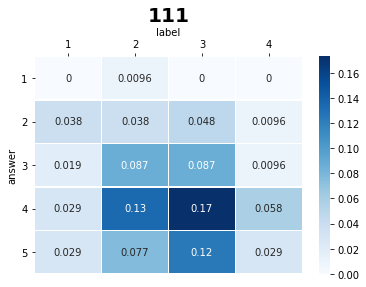

In [68]:
df = pd.DataFrame(np.array(joint_distribution)[0:-1, 0:-1], index = ['1','2','3','4','5'], columns = ['1','2','3','4'])
print(df)
chart = sns.heatmap(df, cmap="Blues", annot = True, linewidth = 0.5)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
chart.set(xlabel = 'label', ylabel = 'answer')
chart.xaxis.tick_top()
chart.xaxis.set_label_position('top')
chart.set_title('111', fontsize = 20, fontweight = 'bold')
title = '456'
plt.savefig('figures/'+title+'.jpg')


In [12]:
data = {'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka'],
        'Age': [21, 19, 20, 18],
        'Stream': ['Math', 'Commerce', 'Arts', 'Biology'],
        'Percentage': [88, 92, 95, 70]}
ex_df = pd.DataFrame(data, columns = ['Name', 'Age', 'Stream', 'Percentage'])
print(ex_df)
for idx in ex_df.index:
    print(ex_df['Name'][idx], ex_df['Stream'][idx])

        Name  Age    Stream  Percentage
0      Ankit   21      Math          88
1       Amit   19  Commerce          92
2  Aishwarya   20      Arts          95
3   Priyanka   18   Biology          70
Ankit Math
Amit Commerce
Aishwarya Arts
Priyanka Biology
